In [1]:
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
import os

import sys
sys.path.append('axionCAMB_and_lin_PS/')
sys.path.append('cosmology/')
sys.path.append('axion_functions/')
sys.path.append('halo_model/')

from axionCAMB_and_lin_PS import axionCAMB_wrapper 
from axionCAMB_and_lin_PS import load_cosmology  
from axionCAMB_and_lin_PS import lin_power_spectrum 
from axionCAMB_and_lin_PS import PS_interpolate 

from halo_model import HMcode_params
from halo_model import PS_nonlin_cold
from halo_model import PS_nonlin_cold_baryons
from halo_model import PS_nonlin_axion
from halo_model import baryons

from axion_functions import axion_params

check
check


In [2]:
### Baryons with no axions

start = time.time()

################################################################################
# Set-up experiment parameters
################################################################################

input_file_path = '/Users/cp2091/PhD/KR_ULADM/axionHMcode_Tagn/input_files/input_file.txt'
input_file_path_baryon = '/Users/cp2091/PhD/KR_ULADM/axionHMcode_Tagn/input_files/input_file_AXION_BARYON.txt'

try:
    f = open(input_file_path)
except IOError:
    print("Input file not accessible, pleas check the file path")
finally:
    f.close()
axionCAMB_exe_path = '/Users/cp2091/PhD/KR_ULADM/axionCAMB'
if os.path.exists(axionCAMB_exe_path+'/./camb') == False:
    print("executabel axionCAMB is not in the given directory, pleas check the path")

In [3]:
################################################################################    
# save cosmological parameter in a dictionary 
################################################################################

cosmos_AXION_BARYON = load_cosmology.load_cosmology_input(input_file_path_baryon) 
cosmos_LCDM = load_cosmology.load_LCDM_cosmology_input(input_file_path)

# Check here later for why LCDM not working

################################################################################
# Run axionCAMB on mixed and LCDM cosmology 
################################################################################

print("axionCAMB is running. Computes transfer function for a LCDM cosmology")
axionCAMB_wrapper.axioncamb_params('paramfiles/paramfile_axionCAMB_LCDM.txt', 
                                   cosmos_LCDM, output_root='paramfiles/cosmos_LCDM', print_info = False)
axionCAMB_wrapper.run_axioncamb('paramfiles/paramfile_axionCAMB_LCDM.txt', 
                                axionCAMB_exe_path,
                                cosmos_LCDM, print_info = False)

print("axionCAMB is running. Computes transfer function for a same cosmology but now with baryons cosmology")
axionCAMB_wrapper.axioncamb_params('paramfiles/paramfile_axionCAMB_AXION_BARYON.txt', 
                                   cosmos_AXION_BARYON, output_root='paramfiles/cosmos_AXION_BARYON', print_info = False)
axionCAMB_wrapper.run_axioncamb('paramfiles/paramfile_axionCAMB_AXION_BARYON.txt', 
                                axionCAMB_exe_path,
                                cosmos_AXION_BARYON, print_info = False)

axionCAMB is running. Computes transfer function for a LCDM cosmology


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


axionCAMB is running. Computes transfer function for a same cosmology but now with baryons cosmology


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


In [4]:
################################################################################
# Create linear power spectra from axionCAMB tranfer functions 
################################################################################
# lin PS on given k range

power_spec_dic_LCDM = lin_power_spectrum.func_power_spec_dic('paramfiles/cosmos_LCDM_transfer_out.dat', cosmos_LCDM)
power_spec_dic_AXION_BARYON = lin_power_spectrum.func_power_spec_dic('paramfiles/cosmos_AXION_BARYON_transfer_out.dat', cosmos_AXION_BARYON)

#interpolated lin PS for the correct computations of the variance

power_spec_interp_dic_LCDM = lin_power_spectrum.func_power_spec_interp_dic(power_spec_dic_LCDM, cosmos_LCDM)
power_spec_interp_dic_ax_AXION_BARYON = lin_power_spectrum.func_power_spec_interp_dic(power_spec_dic_AXION_BARYON, cosmos_AXION_BARYON)

################################################################################
# Compute parameter related to axions and HMCode2020
################################################################################
print('-' * 50)
M_arr = np.logspace(cosmos_LCDM['M_min'], cosmos_LCDM['M_max'], 100)
print("Calculate axion quantities; cut-off mass, central density scale of axion density profile and axion halo mass.")

axion_param_AXION_BARYON = axion_params.func_axion_param_dic(M_arr, cosmos_AXION_BARYON, power_spec_interp_dic_ax_AXION_BARYON, eta_given=False)

print("Create dictionary with parameters of HMCode2020")

hmcode_params_LCDM = HMcode_params.HMCode_param_dic(cosmos_LCDM, power_spec_interp_dic_LCDM['k'], power_spec_interp_dic_LCDM['cold'])
hmcode_params_AXION_BARYON = HMcode_params.HMCode_param_dic(cosmos_AXION_BARYON, power_spec_interp_dic_ax_AXION_BARYON['k'], power_spec_interp_dic_ax_AXION_BARYON['cold'])

print("computation time upto here: {:.0f} s".format(time.time() -start))


--------------------------------------------------
Calculate axion quantities; cut-off mass, central density scale of axion density profile and axion halo mass.
Create dictionary with parameters of HMCode2020
computation time upto here: 26 s


In [15]:
### Get feedback parameters

#T_AGNs = np.power(10, np.array([7.6, 7.8, 8.0, 8.3]))
T_AGNs = np.power(10, np.array([7.6]))
feedback_params = baryons._get_feedback_parameters(T_AGNs)

z=0
B = feedback_params['B0']*np.power(10, z*feedback_params['Bz'])
Mb = feedback_params['Mb0']*np.power(10, z*feedback_params['Mbz'])
fstar = feedback_params['f0']*np.power(10, z*feedback_params['fz'])

print(Mb,fstar)

[3.22106879e+13] [0.0207]


In [16]:
import importlib
importlib.reload(baryons) 


check


<module 'halo_model.baryons' from '/Users/cp2091/PhD/KR_ULADM/axionHMcode_Tagn/halo_model/baryons.py'>

In [17]:
import importlib
importlib.reload(baryons) 
importlib.reload(PS_nonlin_cold_baryons) 

################################################################################
# Caluclate non-linear power spectrum in LCDM cosmology both DM only and with baryons
################################################################################

print('Caluclate non-linear power spectrum in LCDM cosmology with the halo model')
PS_LCDM_matter_nonlin = PS_nonlin_cold.func_non_lin_PS_matter(M_arr, power_spec_dic_LCDM['k'], power_spec_dic_LCDM['power_total'], power_spec_interp_dic_LCDM['k'], power_spec_interp_dic_LCDM['cold'], cosmos_LCDM, hmcode_params_LCDM, cosmos_LCDM['Omega_m_0'], cosmos_LCDM['Omega_db_0'],  alpha = False, eta_given = False, one_halo_damping = True, two_halo_damping = False)
print("k array",power_spec_dic_LCDM['k'])
print("k array size",np.shape(power_spec_dic_LCDM['k']))

print("size of PS array", np.shape(PS_LCDM_matter_nonlin))
print('Caluclate non-linear power spectrum in LCDM cosmology with the halo model - now including baryons')
PS_LCDM_matter_nonlin_baryons = PS_nonlin_cold_baryons.func_non_lin_PS_matter_baryons(M_arr, power_spec_dic_LCDM['k'], power_spec_dic_LCDM['power_total'], power_spec_interp_dic_LCDM['k'], power_spec_interp_dic_LCDM['cold'], cosmos_LCDM, hmcode_params_LCDM, cosmos_LCDM['Omega_m_0'], cosmos_LCDM['Omega_db_0'], cosmos_LCDM['Omega_m_0'],cosmos_LCDM['Omega_d_0'],cosmos_LCDM['Omega_b_0'], Mb, fstar, alpha = False, eta_given = False, 
one_halo_damping = True, two_halo_damping = False)

################################################################################
# Save both power spectra in files
################################################################################

print("Save the non-linear power spectra in a file in the folowing order:")
print("k [h/Mpc], non-lin total matter PS in LCDM [(Mpc/h)^3] and non-lin total matter PS with baryons in LCDM [(Mpc/h)^3]")
data_ax = np.column_stack([power_spec_dic_LCDM['k'], PS_LCDM_matter_nonlin[0], PS_LCDM_matter_nonlin_baryons[0]] )

datafile_path = "output/nonlin_PS_CDMO_CDMBARYONS.txt" #change path if you want
np.savetxt(datafile_path , data_ax)

check
Caluclate non-linear power spectrum in LCDM cosmology with the halo model
k array [7.41840e-05 1.22309e-04 2.01653e-04 3.32470e-04 5.48150e-04 9.03746e-04
 1.49002e-03 2.45664e-03 4.05031e-03 4.58960e-03 5.20070e-03 5.89316e-03
 6.67783e-03 7.56697e-03 8.57450e-03 9.71618e-03 1.10099e-02 1.24758e-02
 1.41370e-02 1.60193e-02 1.81522e-02 2.05692e-02 2.33079e-02 2.64113e-02
 2.99280e-02 3.39128e-02 3.84283e-02 4.35449e-02 4.93429e-02 5.59128e-02
 6.33575e-02 7.07759e-02 7.81943e-02 8.56127e-02 9.30311e-02 1.00449e-01
 1.07868e-01 1.15286e-01 1.22705e-01 1.30123e-01 1.37541e-01 1.44960e-01
 1.52378e-01 1.59797e-01 1.67215e-01 1.74633e-01 1.82052e-01 1.89470e-01
 1.96889e-01 2.04307e-01 2.11725e-01 2.19144e-01 2.32421e-01 2.46503e-01
 2.61438e-01 2.77278e-01 2.94078e-01 3.11896e-01 3.30793e-01 3.50835e-01
 3.72092e-01 3.94636e-01 4.18546e-01 4.43905e-01 6.19519e-01 8.64609e-01
 1.20666e+00 1.68403e+00 2.35025e+00 3.28004e+00 4.57766e+00 6.38864e+00
 8.91607e+00 1.24434e+01 1.73661e+01

/var/folders/57/ldt6stsn41qdw2vwxl2j00kw0000gn/T/ipykernel_2667/3098771930.py:2: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([10^(-3),100])


(0.5, 1.0)

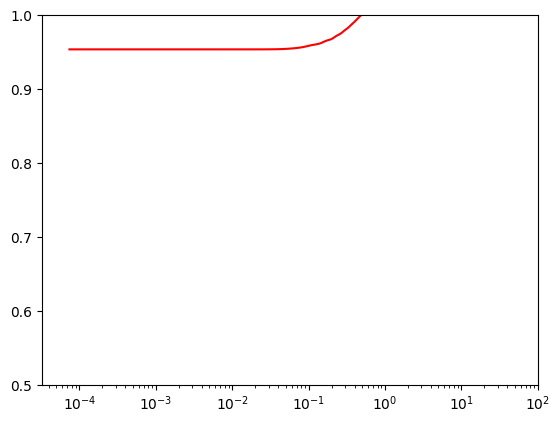

In [13]:
plt.semilogx(power_spec_dic_LCDM['k'], PS_LCDM_matter_nonlin_baryons[0]/PS_LCDM_matter_nonlin[0], label='non-linear ratio baryons', color='r')
plt.xlim([10^(-3),100])
plt.ylim(0.5,1.0)

In [ ]:
### TRYING T_AGN 

# AGN-feedback temperature [K]
T_AGNs = np.power(10, np.array([7.6, 7.8, 8.0, 8.3]))

Rk_feedback = []
for T_AGN in T_AGNs:
    Pk_feedback = hmcode.power(k, zs, results, T_AGN=T_AGN, verbose=False)
    Pk_gravity = hmcode.power(k, zs, results, T_AGN=None)
    Rk = Pk_feedback/Pk_gravity
    Rk_feedback.append(Rk)